In [20]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image


c:\users\yc\appdata\local\programs\python\python36\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
c:\users\yc\appdata\local\programs\python\python36\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
c:\users\yc\appdata\local\programs\python\python36\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
c:\users\yc\appdata\local\programs\python\python36\lib\site-packages\sklearn\datasets\base.py:762: D

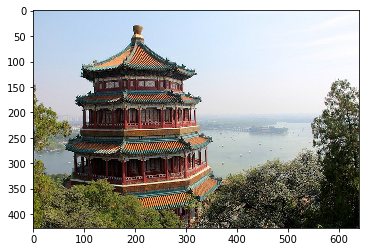

In [27]:
#Load images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)    #this is a mini batch
batch_size, height, width, channels = dataset.shape

plt.imshow(china, cmap="gray")

In [15]:
#Create 2 filters

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #0th filter vertical
filters[3, :, :, 1] = 1 #1st filter horizontal

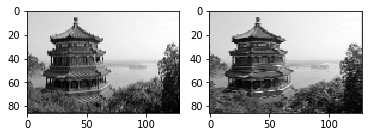

In [34]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,5,5,1], padding="SAME")    #[batch_stride, s_h, s_w, channel_stride]

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(output[0, :, :, 0], cmap="gray")    #plot first image's first feature map (vectical)

plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 1], cmap="gray")    #plot first image's second feature map (horizontal)


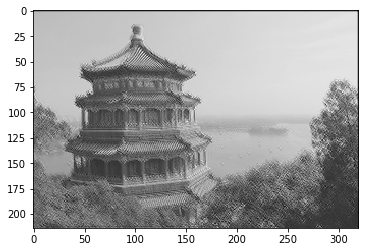

In [41]:
#here we wrote the filters outselves but CNNs learn filters to form appropriate feature maps
#for that use tf.layers.conv2d

conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding="SAME")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map




## Max Pooling

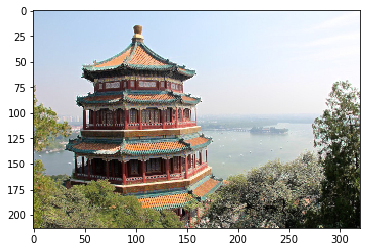

In [44]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})

plt.imshow(output[0].astype(np.uint8))